In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [5]:
RANDOM_STATE = 170723

In [6]:
def research_analysis(data):
  display(data.head())
  print()
  data.info()
  print()
  print(data.describe())
  return

**value_counts для столбца EndDate**

In [8]:
data_contract['EndDate'].value_counts()

No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2015-04-01       2
2014-11-01       1
2014-10-01       1
2014-06-01       1
Name: EndDate, Length: 67, dtype: int64

**value_counts для столбца TotalCharges**

In [9]:
data_contract['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
40.1        4
1007.5      4
           ..
2089.42     1
1857.5      1
1341.3      1
892.4       1
699.72      1
Name: TotalCharges, Length: 6658, dtype: int64

**Изменение типа в столбце BeginDate**

In [10]:
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'], format='%Y-%m-%d')


**Удаление строк с пустыми значениями в TotalCharges**

In [11]:
data_contract.drop(data_contract.loc[data_contract['TotalCharges']==' '].index, inplace=True, axis=0)

**Изменение типа в TotalCharges**

In [12]:
data_contract['TotalCharges'] = data_contract['TotalCharges'].astype(float)

In [15]:
research_analysis(data_personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


**Измеение типа в столбце SeniorCitizen**

In [16]:
data_personal['SeniorCitizen'] = data_personal['SeniorCitizen'].astype(object)

In [18]:
research_analysis(data_phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

        customerID MultipleLines
count         6361          6361
unique        6361             2
top     9978-HYCIN            No
freq             1          3390


<div><h3>Промежуточный вывод.</h3></div>



В данных из файла contract_new.csv 7043 строки. Пропусков нет. Есть как категориальные признаки, так и числовые. Признак TotalCharges из типа object был переведён в тип float, также в этом признаке было небольшое число пустых строк, которые были удалены. Признак BeginDate с датами был переведён из типа object в тип DateTime. В столбце EndDate 5942 строки со значением No, остальные значения - даты.\
\
В данных из файла internet_new.csv 5517 строк, что меньше, чем в предыдущих данных. Признаки все категориальные.\
\
В данных из файла personal_new.csv 7043 строки. Признак SeniorCitizen был переведён из типа int64 с 0-ми и 1-ми в тип object. Признаки все категориальные.\
\
В данных из файла phone_new.csv 6361 строка. И два столбца, включая столбец с ID клиентов. Второй столбец категориальный с типом object.\
\
Все таблицы имеют общий столбец customerID.

**Объединение таблиц**

In [19]:
data = data_contract.set_index('customerID').join([data_internet.set_index('customerID'),\
                                            data_personal.set_index('customerID'),\
                                            data_phone.set_index('customerID')], how='left').reset_index()

In [20]:
data.drop('customerID', axis=1, inplace=True)

In [21]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   object        
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   InternetService   5512 non-null   object        
 8   OnlineSecurity    5512 non-null   object        
 9   OnlineBackup      5512 non-null   object        
 10  DeviceProtection  5512 non-null   object        
 11  TechSupport       5512 non-null   object        
 12  StreamingTV       5512 non-null   object        
 13  StreamingMovies   5512 non-null   object        
 14  gender            7032 n

In [22]:
research_analysis(data)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   object        
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   InternetService   5512 non-null   object        
 8   OnlineSecurity    5512 non-null   object        
 9   OnlineBackup      5512 non-null   object        
 10  DeviceProtection  5512 non-null   object        
 11  TechSupport       5512 non-null   object        
 12  StreamingTV       5512 non-null   object        
 13  StreamingMovies   5512 non-null   object        
 14  gender            7032 

**Заполнение пропусков**

In [23]:
data.iloc[:, [7, 8, 9, 10, 11, 12, 13]] = data.iloc[:, [7, 8, 9, 10, 11, 12, 13]].fillna('no_internet')
data.iloc[:, 18] = data.iloc[:, 18].fillna('no_phone')

**Графики распределений**

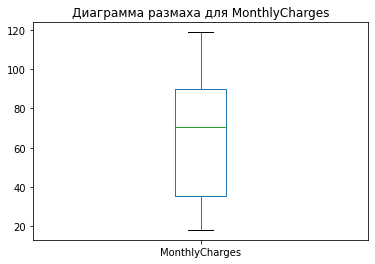

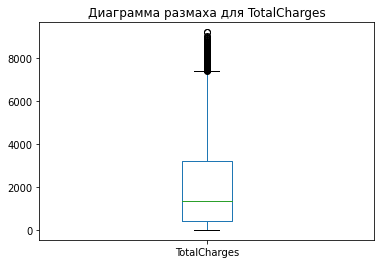

In [24]:
data['MonthlyCharges'].plot(kind='box', title='Диаграмма размаха для MonthlyCharges')
plt.show()
data['TotalCharges'].plot(kind='box', title='Диаграмма размаха для TotalCharges')
plt.show()

In [25]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   object        
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   InternetService   7032 non-null   object        
 8   OnlineSecurity    7032 non-null   object        
 9   OnlineBackup      7032 non-null   object        
 10  DeviceProtection  7032 non-null   object        
 11  TechSupport       7032 non-null   object        
 12  StreamingTV       7032 non-null   object        
 13  StreamingMovies   7032 non-null   object        
 14  gender            7032 n

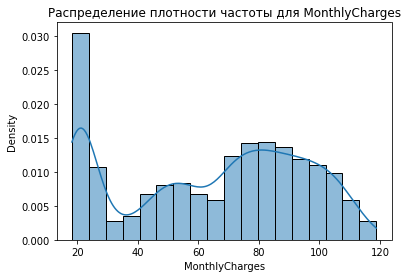

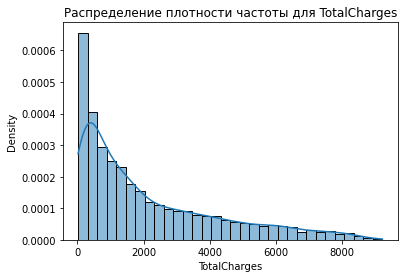

In [26]:
sns.histplot(data["MonthlyCharges"], kde=True, stat='density').set(title=\
'Распределение плотности частоты для MonthlyCharges')
plt.show()
sns.histplot(data=data, x="TotalCharges", kde=True, stat='density').set(title=\
'Распределение плотности частоты для TotalCharges')
plt.show()


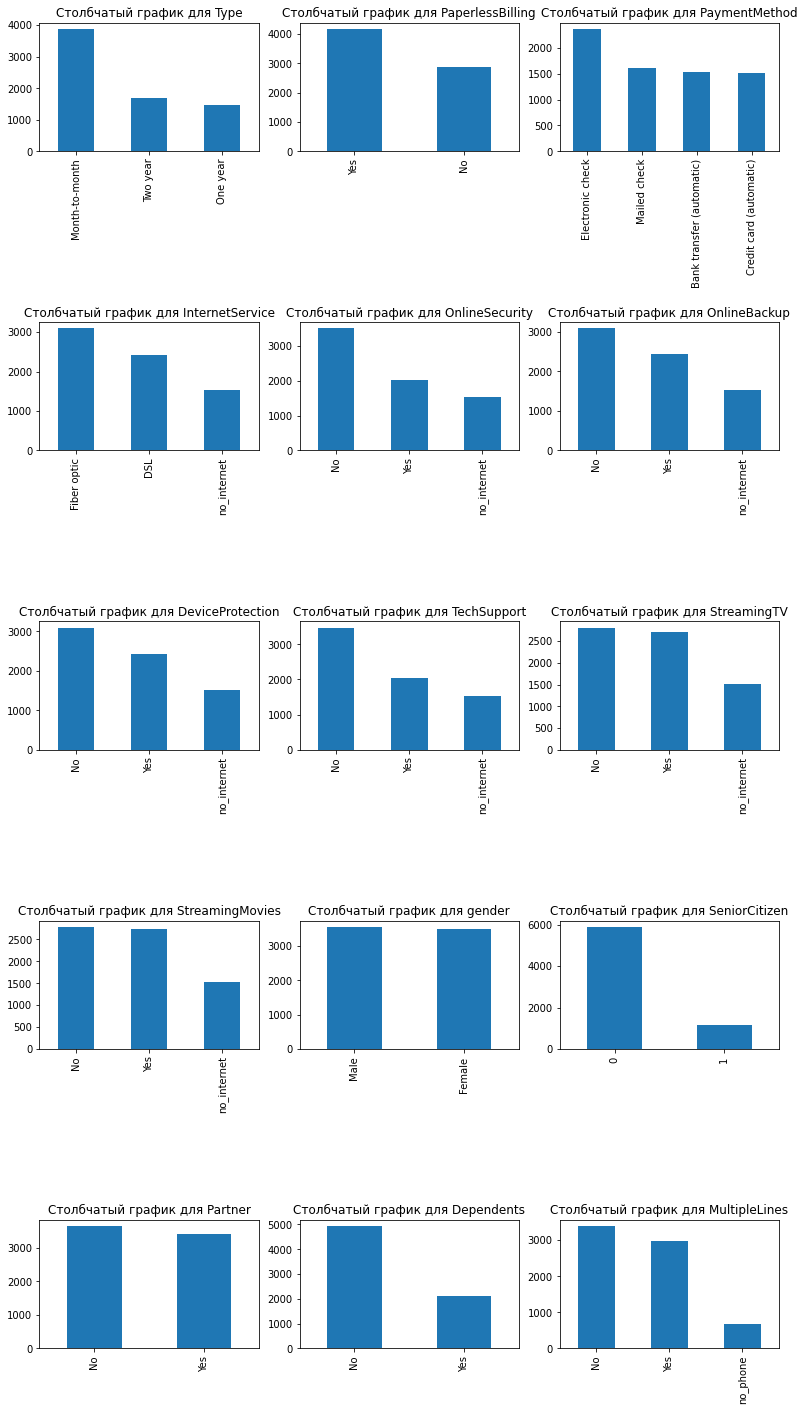

In [27]:
fig, axs = plt.subplots(5, 3, figsize=(11,19))
fig.tight_layout(h_pad=15, w_pad=1)
columns_bar = ['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity',\
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\
               'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines']
for col, place_1, place_2 in zip(columns_bar, [int(j) for j in ''.join([f'{i}'*3 for i in range(5)])],\
                                 [int(j) for j in''.join(['012'*5])]):
    data[col].value_counts().plot(title=f'Столбчатый график для {col}', kind='bar', ax=axs[place_1, place_2])
plt.show()

**Промежуточный вывод.**
\
Были объедененны все данные в одну таблицу. По диаграмме размаха видно, что присутствуют выбросы в признаке TotalCharges, которые были удалены.
\
Для признака Type заметно преобладает ежемесячный тип оплаты. Также для признака SeniorCitizen хорошо видно преобладание отсутствия пенсионного статуса по возрасту. Как и в случае признака Dependents, заметно сравнимо большее колличество с вариантом "отсутствие иждевенцев". Для остальных признаков различия среди вариантов не так выделяются.

**Создание признака длительности контракта**

In [28]:
data['EndDate_copy'] = data['EndDate'].copy()

In [29]:
data.loc[data['EndDate_copy']=='No', 'EndDate_copy'] = '2020-02-01'
data['EndDate_copy'] = pd.to_datetime(data['EndDate_copy'], format='%Y-%m-%d')
data['duration'] = (data['EndDate_copy'] - data['BeginDate']).dt.days

In [30]:
data.drop('EndDate_copy', axis=1, inplace=True)

**Создание целевого признака из EndDate**

In [31]:
data.loc[data['EndDate']!='No', 'customer_outflow'] = 1
data.loc[data['EndDate']=='No', 'customer_outflow'] = 0

In [32]:

data['customer_outflow'].value_counts()

0.0    5931
1.0    1101
Name: customer_outflow, dtype: int64

**Исследование на сбалансированность классов в целевом признаке.**

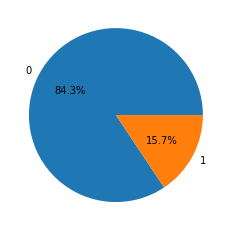

In [33]:
labels = '0', '1'
sizes = [5931, 1101]
fig, axs = plt.subplots()
axs.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

**Промежуточный вывод.**
\
Был создан целевой признак из столбца EndDate(дата окончания пользования услугами). Добавлен новый признак для длительности контракта. Два класса в целевом признаке оказались несбалансированны: 15,7% 1-иц и 84,3% 0-ей.

**Удаление признаков с датами BeginDate и End Date**

In [34]:
data.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

**Исследование на мультиколлинеарность признаков и на корреляцию с целевым признаком**

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'duration', 'customer_outflow']
interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'duration', 'customer_outflow']


<AxesSubplot:>

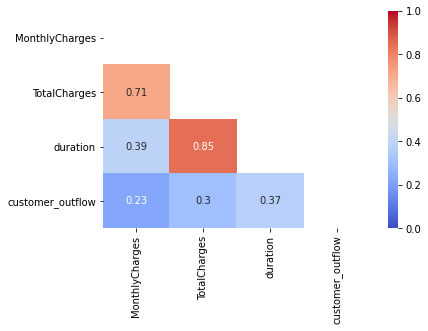

In [35]:
upp_mat = np.triu(data.loc[:, ['MonthlyCharges', 'TotalCharges', 'duration', 'customer_outflow']].phik_matrix())

sns.heatmap(data.loc[:, ['MonthlyCharges', 'TotalCharges', 'duration', 'customer_outflow']].phik_matrix(),\
            vmin = 0, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

interval columns not set, guessing: ['TotalCharges', 'customer_outflow']
interval columns not set, guessing: ['TotalCharges', 'customer_outflow']


<AxesSubplot:>

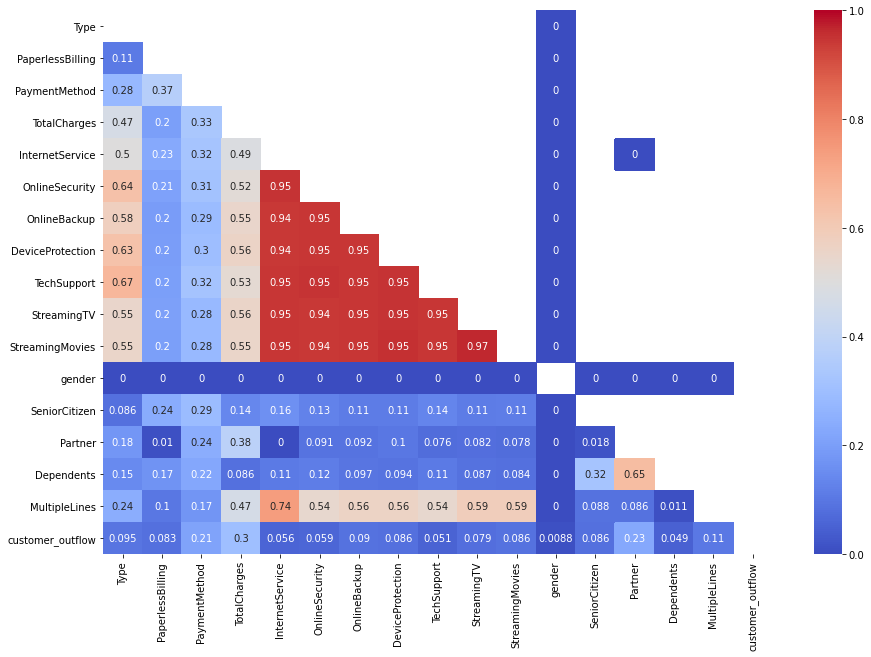

In [36]:
fig, axs = plt.subplots(figsize=(15,10))
upp_mat = np.triu(data.drop(['MonthlyCharges', 'duration'], axis=1).phik_matrix())

sns.heatmap(data.drop(['MonthlyCharges', 'duration'], axis=1).phik_matrix(),\
            vmin = 0, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat, ax=axs)

In [37]:
data.drop(['TotalCharges', 'InternetService', 'OnlineSecurity', 'DeviceProtection',\
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender'], axis=1, inplace=True)

**Промежуточный вывод.**
\
Признаки InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies оказались сильно коррелированны между собой. Поэтому в данных был оставлен только признак OnlineBackup, так как из всех перечисленных он имеет больший коэффициент корреляции с целевым признаком. Из колличественных признаков был удалён признак TotalCharges. Также был удалён признак gender, так как он имеет нулевую корреляцию.

**Разделение данных на обучающую и тестовую выборки. Кодирование с помощью OneHotEncoder и масштабирование.**

In [38]:
target_col = 'customer_outflow'

cat_cols = data.drop([target_col], axis=1).select_dtypes(exclude=np.number).columns.tolist()
num_cols = data.drop([target_col], axis=1).select_dtypes(include=np.number).columns.tolist()

display(cat_cols)
display(num_cols)

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'OnlineBackup',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines']

['MonthlyCharges', 'duration']

In [39]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=RANDOM_STATE,\
                                         stratify=data['customer_outflow'])

In [40]:
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe.fit(data_train[cat_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [41]:
data_tr = pd.DataFrame(ohe.transform(data_train[cat_cols]),
                    columns=ohe.get_feature_names_out(), index=data_train.index)
data_tr = data_train.drop(columns=cat_cols).join(data_tr)

data_ts = pd.DataFrame(ohe.transform(data_test[cat_cols]),
                    columns=ohe.get_feature_names_out(), index=data_test.index)
data_ts = data_test.drop(columns=cat_cols).join(data_ts)

In [42]:
sc = StandardScaler()
sc.fit(data_tr[num_cols])
data_tr[num_cols] = sc.transform(data_tr[num_cols])
data_ts[num_cols] = sc.transform(data_ts[num_cols])

**Подбор гиперпараметров для модели CatBoostClassifier.**

In [43]:
features_train = data_tr.drop('customer_outflow', axis=1)
features_test = data_ts.drop('customer_outflow', axis=1)
target_train = data_tr['customer_outflow']
target_test = data_ts['customer_outflow']

In [44]:

features_train.head()

,MonthlyCharges,duration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_Yes,OnlineBackup_no_internet,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes,MultipleLines_no_phone
4492,1.286392,1.403669,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6751,-0.334283,0.423999,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6776,1.486905,0.248536,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
831,0.785938,0.334806,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3840,-1.494276,-0.864193,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [117]:
model_cb_grid = CatBoostClassifier(random_state=RANDOM_STATE)

In [118]:
parameters = {'depth': [3, 4, 6],
              'learning_rate' : [0.1, 0.3, 0.6],
              'iterations' : [130, 200, 300]}

In [119]:
grid_cb = GridSearchCV(estimator = model_cb_grid,
                       param_grid = parameters,
                       scoring = 'roc_auc',
                       cv = 5,
                       verbose=0,
                       n_jobs=-1)

grid_cb.fit(features_train, target_train)

In [130]:
print('Лучший результат метрики для модели CatBoostClassifier : ', grid_cb.best_score_)

Лучший результат метрики для модели CatBoostClassifier :  0.9328522851475347


In [131]:
print('Параметры наилучшей модели CatBoostClassifier : ', grid_cb.best_params_)

Параметры наилучшей модели CatBoostClassifier :  {'depth': 3, 'iterations': 300, 'learning_rate': 0.3}


**Подбор гиперпараметров для модели LGBMClassifier.**

In [ ]:
model_lgb = LGBMClassifier(random_state=RANDOM_STATE)

params_lgb = param_grid = {
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'max_depth': [5,10,50,100]#,
    #'num_threads':[1] #Код ревьюера
}

grid_lgb = GridSearchCV(model_lgb, params_lgb, scoring='roc_auc', cv=5)
grid_lgb.fit(features_train, target_train)

In [55]:
print('Лучший результат метрики для модели LGBMClassifier : ', grid_lgb.best_score_)

Лучший результат метрики для модели LGBMClassifier :  0.888544302927173


In [56]:
print('Параметры наилучшей модели LGBMClassifier : ', grid_lgb.best_params_)

Параметры наилучшей модели LGBMClassifier :  {'learning_rate': 0.5, 'max_depth': 5, 'num_leaves': 32}


**Подбор гиперпараметров для модели LogisticRegression.**

In [132]:
model_lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=RANDOM_STATE)

In [133]:
params_lr = {'penalty':['l1', 'l2'],
             'C':list(range(5, 16))}

In [134]:
grid_lr = GridSearchCV(estimator = model_lr,
                       param_grid = params_lr,
                       scoring = 'roc_auc',
                       cv = 5,
                       verbose=0,
                       n_jobs=-1)

In [135]:
grid_lr.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=170723,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [136]:
print('Лучшая метрика для модели LogisticRegression : ', grid_lr.best_score_)

Лучшая метрика для модели LogisticRegression :  0.7519764621703567


In [137]:
print('Параметры наилучшей модели LogisticRegression : ', grid_lr.best_params_)

Параметры наилучшей модели LogisticRegression :  {'C': 5, 'penalty': 'l1'}


**Тестирование модели CatBoostClassifier.**

In [138]:
model = grid_cb.best_estimator_

In [139]:
probabilities = model.predict_proba(features_test)[:, 1]

In [140]:
auc_roc = roc_auc_score(target_test, probabilities)

In [141]:
print('Значение метрики AUC_ROC на тестовой выборке : ', auc_roc)

Значение метрики AUC_ROC на тестовой выборке :  0.9300361674737938


**Промежуточный вывод.**
\
Были обучены три модели с подбором гиперпараметров : CatBoostClassifier, LGBMClassifier, LogisticRegression. Лучший результат метрики AUC-ROC на обучающей выборке показала модель CatBoostClassifier с параметрами : depth=3, iterations=300, learning_rate=0.3.
\
На тестовой выборке выбранная модель показала результат метрики AUC-ROC>0.9.  

**ROC кривая.**

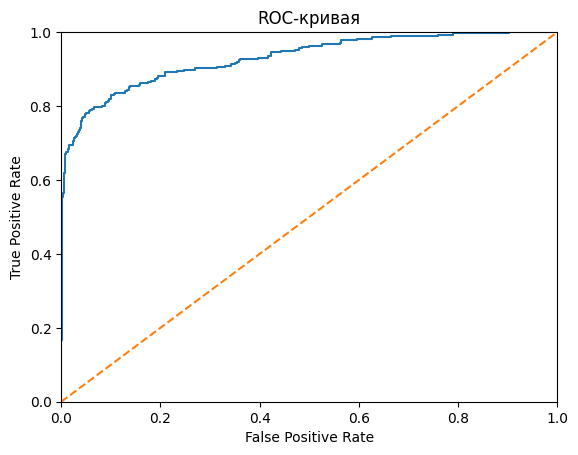

In [61]:
fpr, tpr, thresholds = roc_curve((target_test).astype(int), probabilities)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Исследование на важность признаков.**

,feature,importance
0,duration,72.599830
1,MonthlyCharges,11.102708
2,Type_Two year,2.973177
3,Partner_Yes,2.780046
4,Type_One year,1.378807
5,MultipleLines_no_phone,1.316921
6,MultipleLines_Yes,1.309108
7,PaymentMethod_Mailed check,1.280279
8,OnlineBackup_Yes,1.272698
9,Dependents_Yes,1.198833


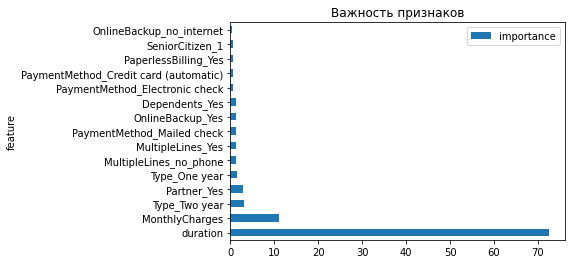

In [56]:
importances = model.feature_importances_
feature_list = list(features_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance', ascending = False).\
reset_index(drop=True)
display(feature_results.head(10))
feature_results.plot(kind='barh', x='feature', title='Важность признаков')
plt.show()

**Матрица ошибок.**

In [63]:
predicted_test = model.predict(features_test)

In [64]:
cm = confusion_matrix(target_test, predicted_test)

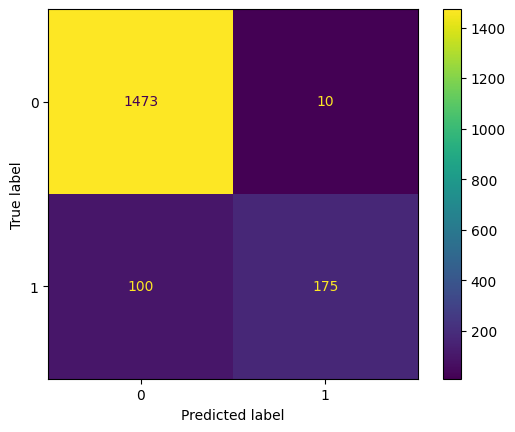

In [72]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

**Промежуточный вывод.**
\
ROC кривая показала адекватность модели. Самым важным признаком оказался признак duration, затем MonthlyCharges. Матрица ошибок показала, что верно предсказанных моделью ответов положительного класса равно 175, неверно - 10. Также модель верно предсказала 1473 ответов отрицательного класса и 100 неверно.

<div>
    <font color='green'><h1>Отчёт</h1></font></div>


Был проведён исследовательский анализ данных, заполнены пропуски, выведены графики распределений. Данные поделены на две выборки : тренировочную и тестовую. Просмотрена корреляция признаков между собой и с целевым признаком, применены энкодер и масштабирование. Был изучен на дисбаланс целевой признак. Проведён поиск гиперпараметров для трёх моделей : catboost, ldbm, logisticRegression. Модель решающего леса, которая была изначально в плане, не бралась, так как хватило и перечисленных моделей. Также исспользовалась не простая кроссвалидация, а GridSearchCV. Найдена наилучшая модель с приемлемой метрикой ROC-AUC на тестовой выборке. Выведен график ROC  кривой.  Результат не сравнивался с dummy моделью, как было прописано в плане, так как модель уже была проверена на адекватность с помощью ROC кривой. Были изучены на важность признаки, найдена матрица ошибок.

Допустимая метрика была достигнута с первого раза после преобразования данных. Но её также удалось немного повысить с помощью удаления признака gender, который имел нулевую корреляцию. На необходимой модели CatBoostClassifer метрика повысилась, но на модели LogisticRegression немного понизилась. 

Ключевыми шагами в решении задачи являются : заполнение пропусков, объединение данных, поиск гиперпараметров, тестирование модели.

Был создан новый признак длительности контракта. После исследования на корреляцию, были удалены признаки, кроме одного, из файла internet_new.csv, столбцы TotalCharges, gender.

Лучшей моделью оказалась модель CatBoostClassifier с гиперпараметрами  depth=3, iterations=300, learning_rate=0.3. На тестовой выборке значение ROC-AUC вышло равным 0.9300361674737938.

В данных из файла contract_new.csv 7043 строки. Пропусков нет. Есть как категориальные признаки, так и числовые. Признак TotalCharges из типа object был переведён в тип float, также в этом признаке было небольшое число пустых строк, которые были удалены. Признак BeginDate с датами был переведён из типа object в тип DateTime. В столбце EndDate 5942 строки со значением No, остальные значения - даты.

В данных из файла internet_new.csv 5517 строк, что меньше, чем в предыдущих данных. Признаки все категориальные.

В данных из файла personal_new.csv 7043 строки. Признак SeniorCitizen был переведён из типа int64 с 0-ми и 1-ми в тип object. Признаки все категориальные.

В данных из файла phone_new.csv 6361 строка. И два столбца, включая столбец с ID клиентов. Второй столбец категориальный с типом object.

Все таблицы имеют общий столбец customerID.

Были объедененны все данные в одну таблицу. 
Для признака Type заметно преобладает ежемесячный тип оплаты. Также для признака SeniorCitizen хорошо видно преобладание отсутствия пенсионного статуса по возрасту. Как и в случае признака Dependents, заметно сравнимо большее колличество с вариантом "отсутствие иждевенцев". Для остальных признаков различия среди вариантов не так выделяются.

Был создан целевой признак из столбца EndDate(дата окончания пользования услугами). Добавлен новый признак для длительности контракта. Два класса в целевом признаке оказались несбалансированны: 15,7% 1-иц и 84,3% 0-ей.

Признаки InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies оказались сильно коррелированны между собой. Поэтому в данных был оставлен только признак OnlineBackup, так как из всех перечисленных он имеет больший коэффициент корреляции с целевым признаком. Из колличественных признаков был удалён признак TotalCharges. Также был удалён признак gender, так как он имеет нулевую корреляцию.

Были обучены три модели с подбором гиперпараметров : CatBoostClassifier, LGBMClassifier, LogisticRegression. Лучший результат метрики AUC-ROC на обучающей выборке показала модель CatBoostClassifier с параметрами : depth=3, iterations=300, learning_rate=0.3.
На тестовой выборке выбранная модель показала результат метрики AUC-ROC>0.9.

ROC кривая показала адекватность модели. Самым важным признаком оказался признак duration, затем MonthlyCharges. Матрица ошибок показала, что верно предсказанных моделью ответов положительного класса равно 175, неверно - 10. Также модель верно предсказала 1473 ответов отрицательного класса и 100 неверно. Получается, что исходя из такого предсказания 175 клиентам верно были бы предложены промокоды и специальные условия, при этом 10 клиентам можно было бы не делать особых предложений, так как они бы не ушли. Также 100 клиентам, которые ушли на самом деле, не было предложено особых предложений, что смогло бы их оставить среди клиентов, что является упущением.